In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stat 
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.graphics.regressionplots import influence_plot 
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore') 

##### Note:- %matplotlib inline is used to diplay the plots directly

### 1) Importing File and removing unnecessary columns

In [2]:
df=pd.read_csv('ToyotaCorolla.csv',encoding='LATIN1') # I used encoding because my notebook was unable to load the data

In [3]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.shape

(1436, 38)

In [5]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### 2) Checking Data Type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


### 3) Performing Descriptive Analysis

In [9]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [10]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### 4) Renaming Columns

In [11]:
df2=df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

In [12]:
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### 5) Checking for Null and Duplicated Values

In [13]:
df2.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [14]:
df2.duplicated().sum()

1

In [15]:
df2[df2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


##### Note:- we will drop this row

In [16]:
df2=df2.drop_duplicates().reset_index(drop=True)

In [17]:
df2.duplicated().sum()

0

### 6) Fitting A Model

In [18]:
model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = df2).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:56:40   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 7) Calculating VIF

In [20]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared  
vif_age = 1/(1-rsq_age) # 1.88

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared  
vif_km = 1/(1-rsq_km) #  1.76

rsq_hp = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared  
vif_hp = 1/(1-rsq_hp) #  1.42

rsq_cc = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df2).fit().rsquared  
vif_cc = 1/(1-rsq_cc) # 1.16

rsq_doors = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df2).fit().rsquared  
vif_doors = 1/(1-rsq_doors) #  1.16

rsq_gears = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df2).fit().rsquared  
vif_gears = 1/(1-rsq_gears) #  1.1

rsq_tax = smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df2).fit().rsquared  
vif_tax = 1/(1-rsq_tax) #  2.31

rsq_weight = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df2).fit().rsquared  
vif_weight = 1/(1-rsq_weight) #  2.52

df3 = {'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_tax,vif_weight]}
Vif_frame = pd.DataFrame(df3)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


### 8) Doing Residual Analysis

##### a) Plotting Q-Q Plot

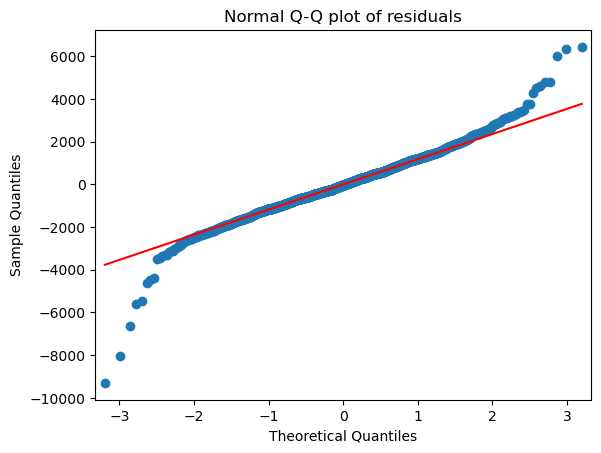

In [25]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals");

##### b) Residual Plot for Homoscedasticity

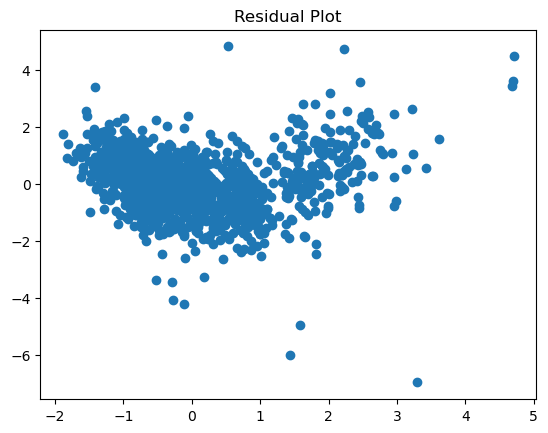

In [26]:
def a( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(a(model.fittedvalues),a(model.resid))
plt.title('Residual Plot');

##### c) Residual Plot vs Regressor Plot

eval_env: 1


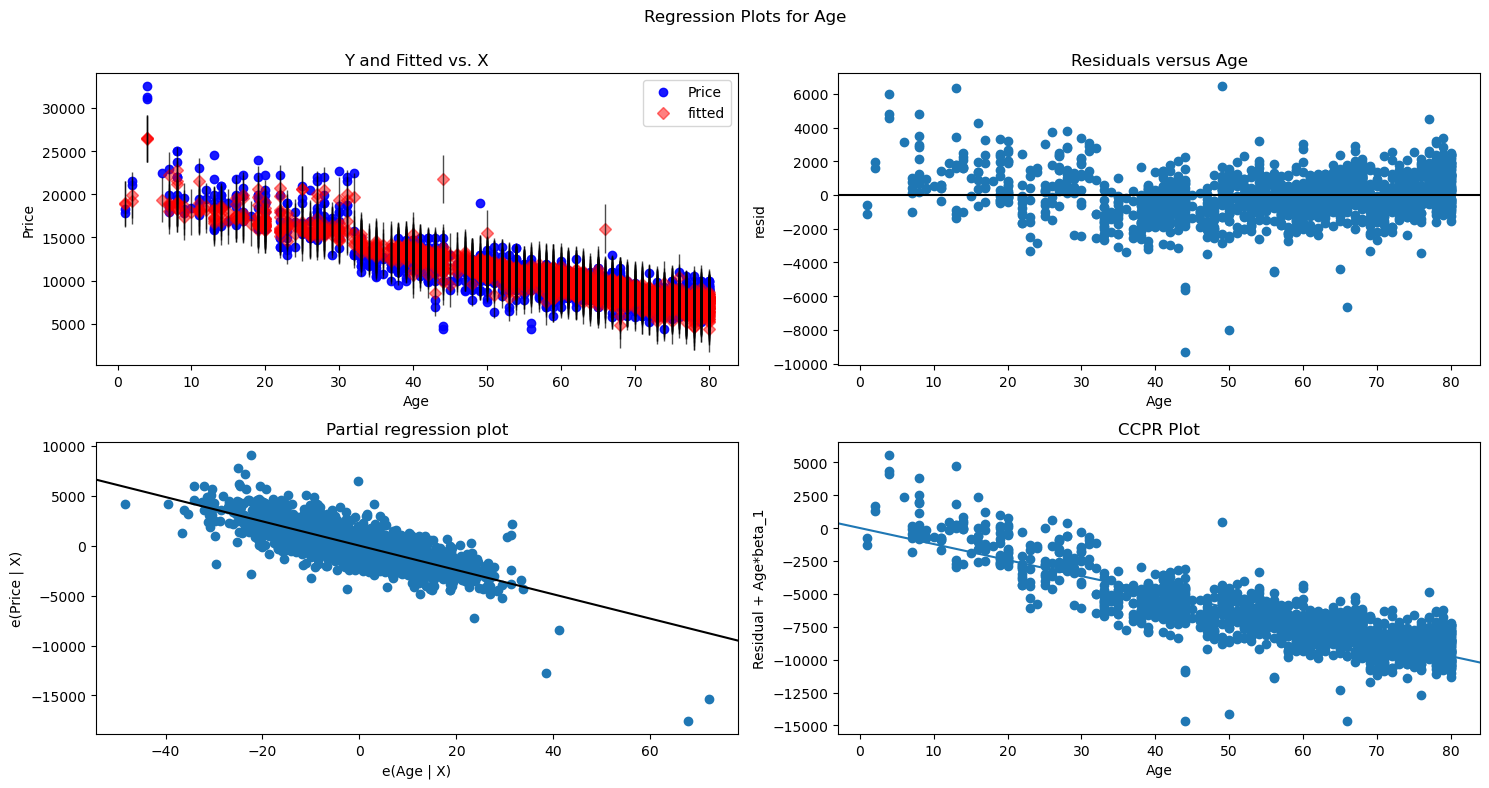

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)

eval_env: 1


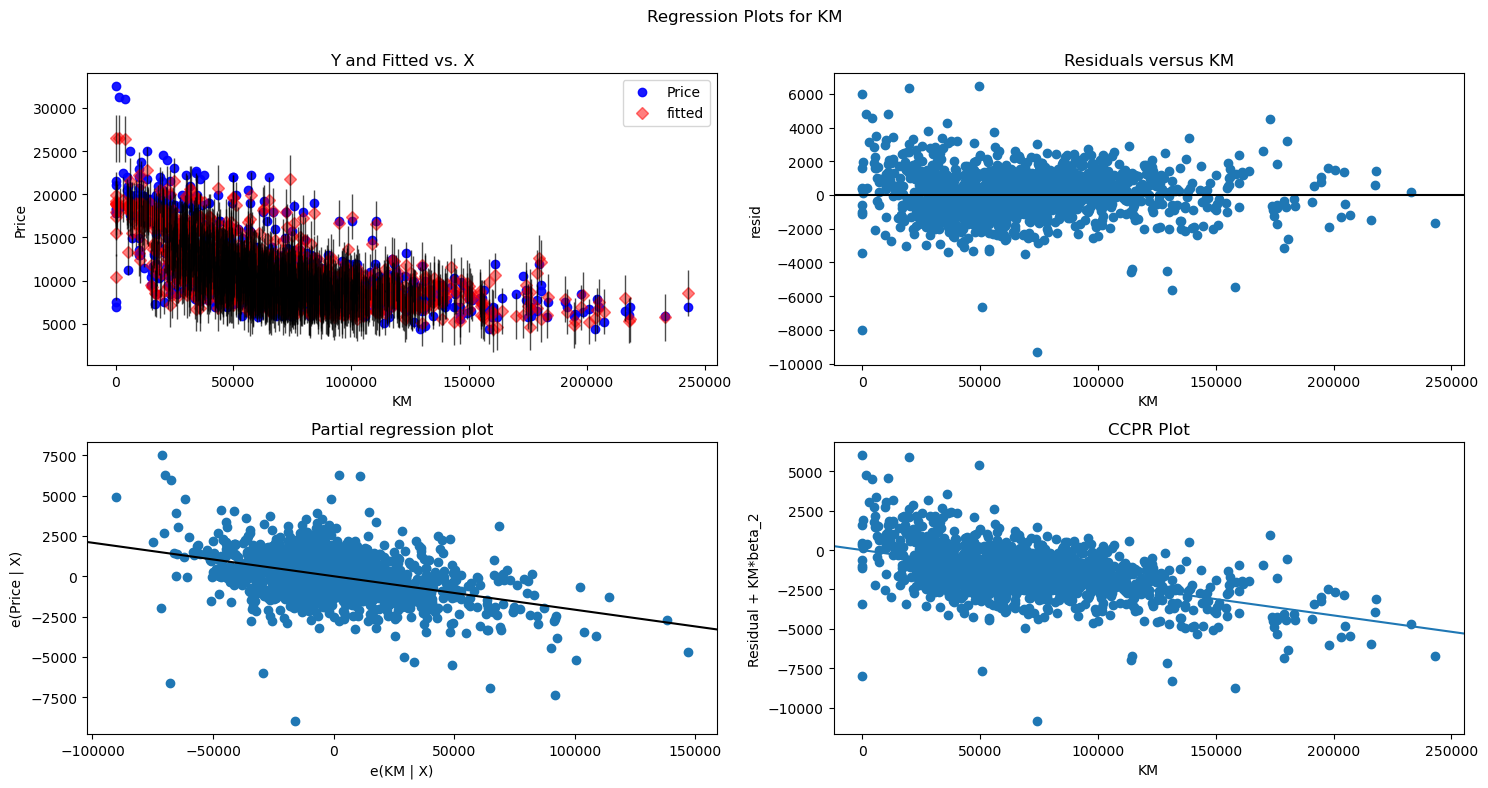

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)

eval_env: 1


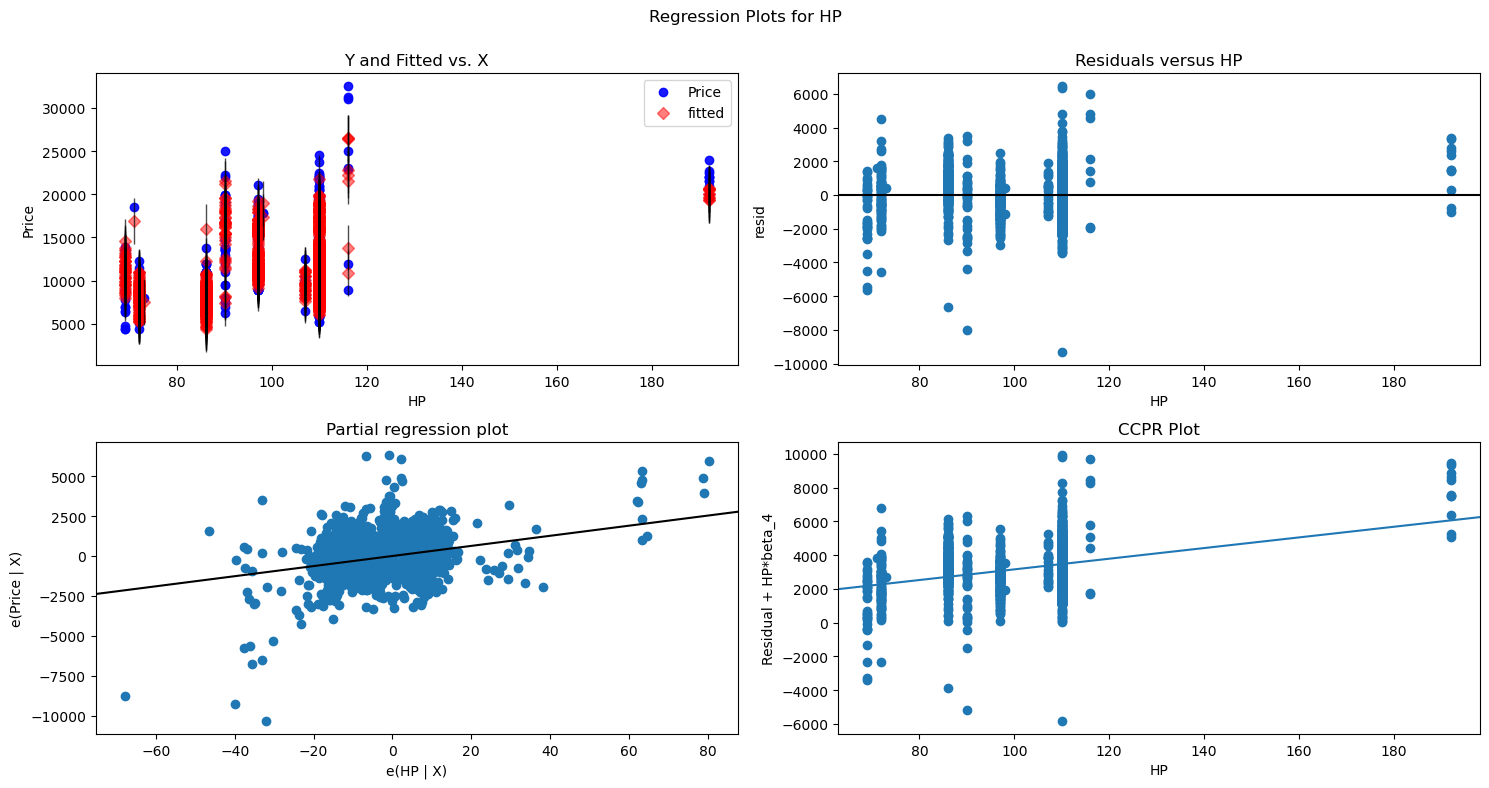

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)

eval_env: 1


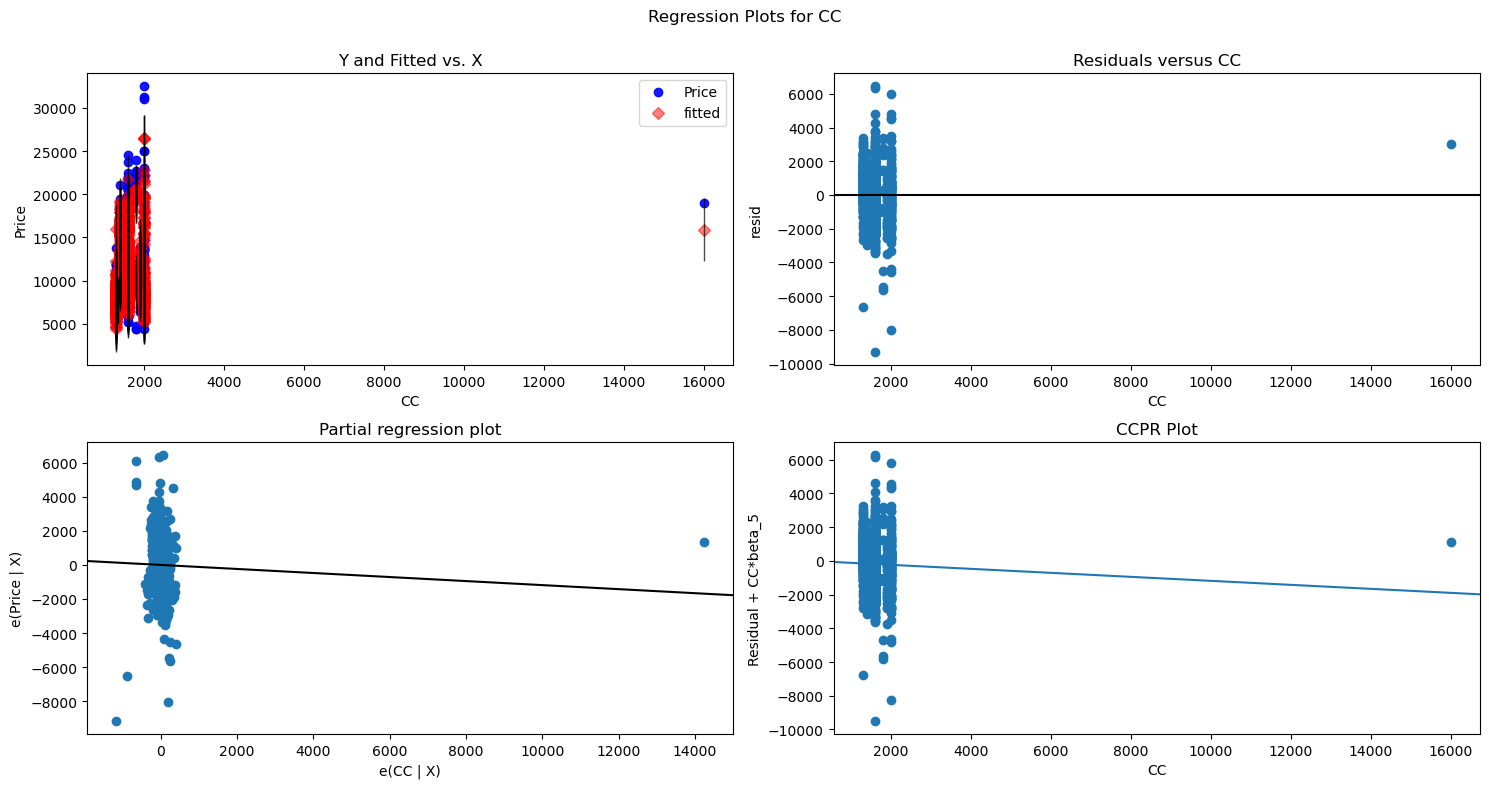

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)

eval_env: 1


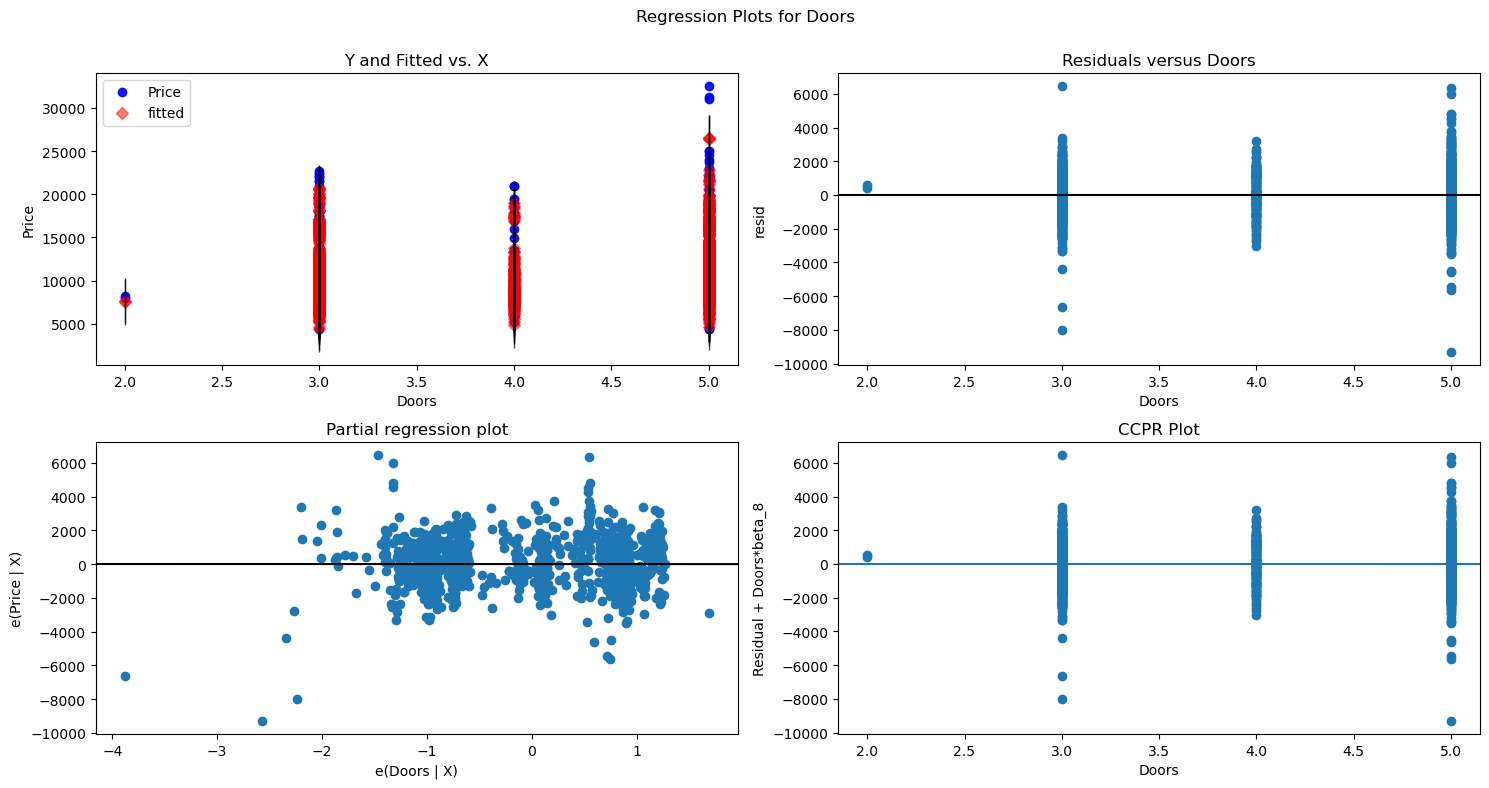

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)

eval_env: 1


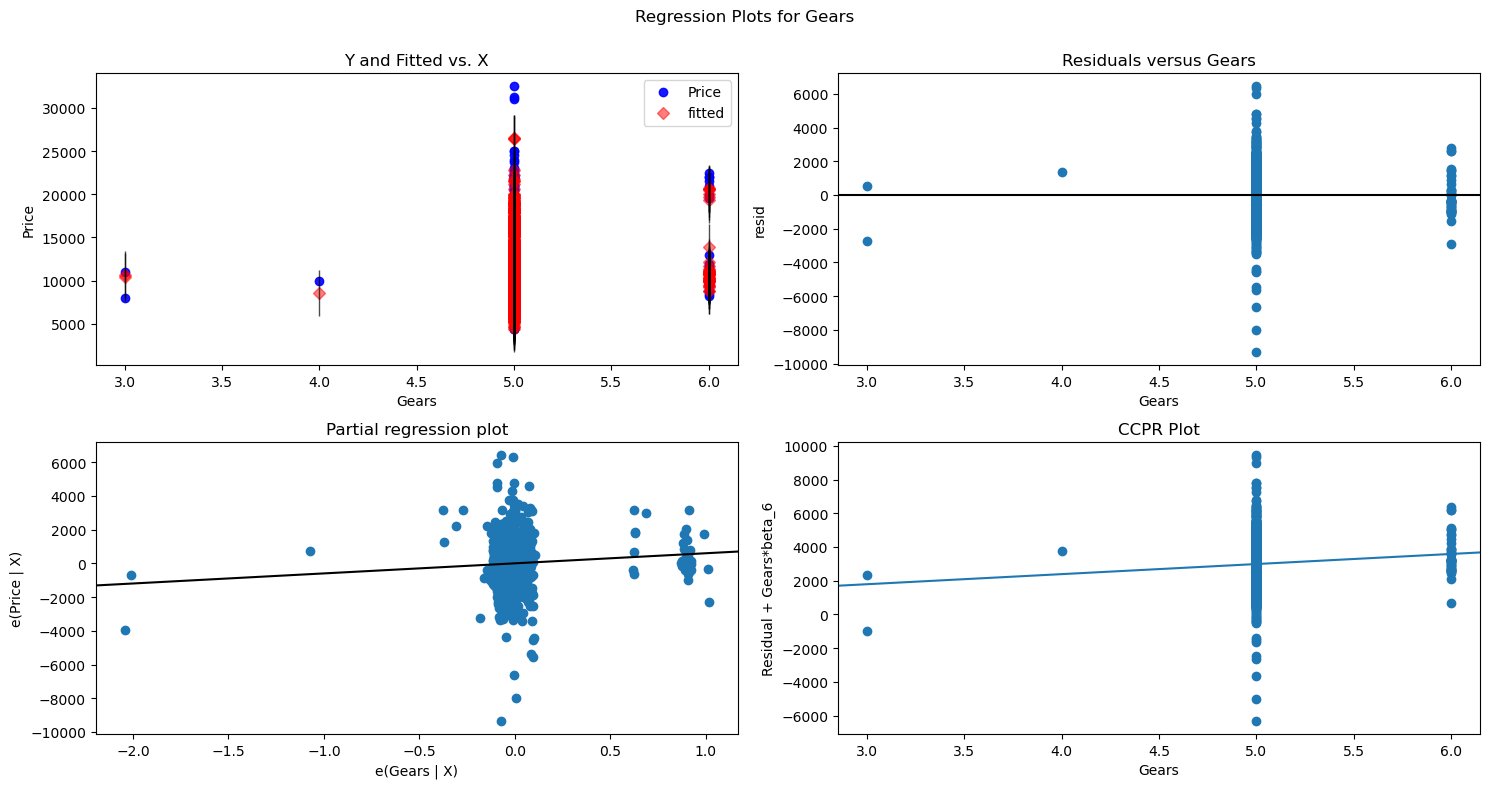

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)

eval_env: 1


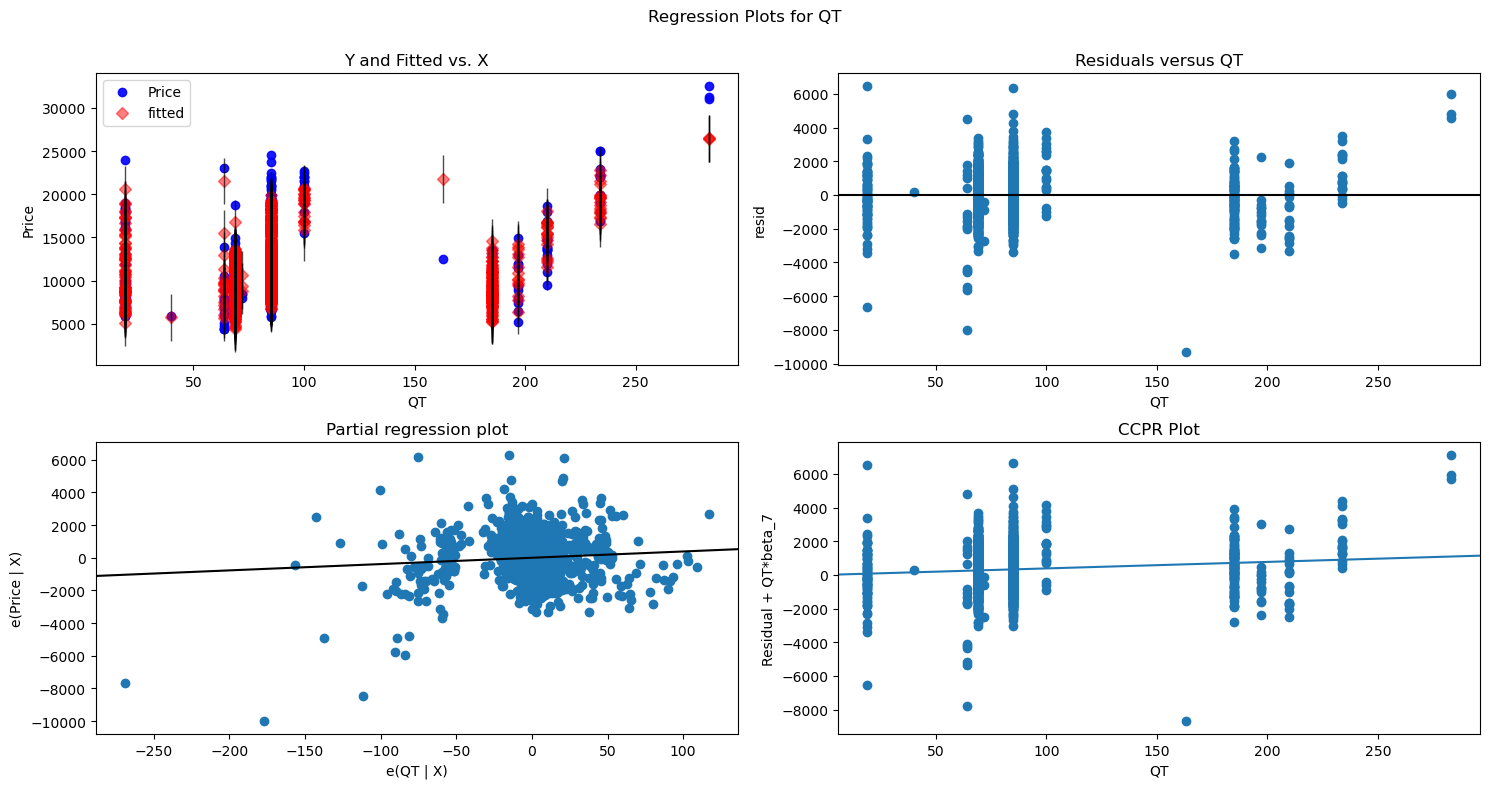

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)

eval_env: 1


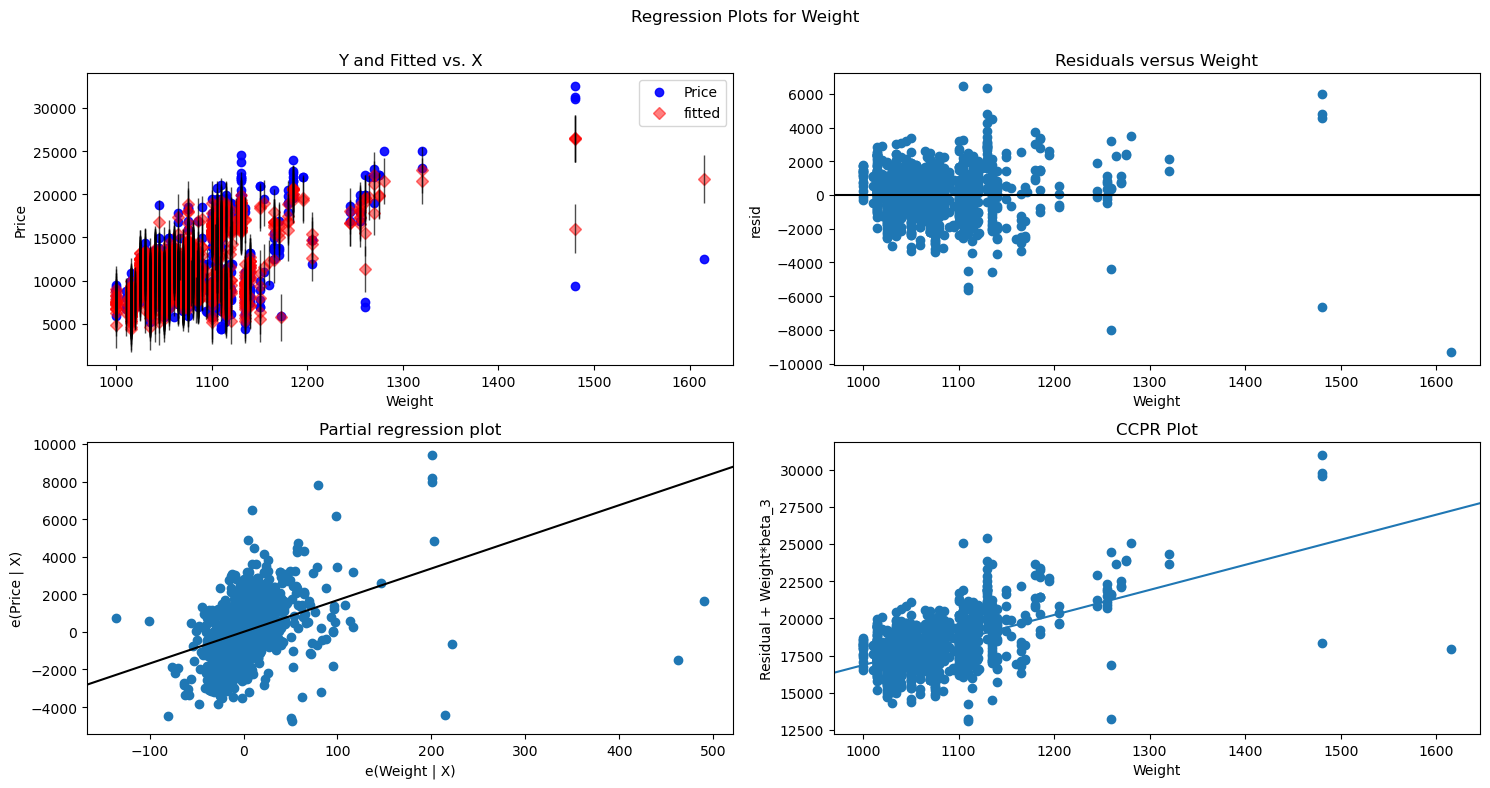

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)

### 9) Checking For Outliers

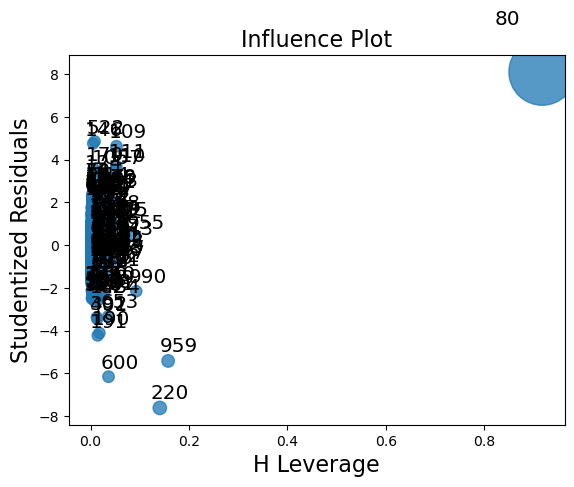

In [40]:
influence_plot(model);

In [44]:
df2[df2.index.isin([80])]
df2.head(83)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,18950,25,20019,110,16000,5,5,100,1180
81,17250,29,20000,110,1600,5,5,85,1115


##### Note:- We will have to remove 80)

In [42]:
df4= df2.copy()
df4=df4.drop(df4.index[[80]],axis=0).reset_index(drop=True)

In [43]:
df4.head(83)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,17250,29,20000,110,1600,5,5,85,1115
81,15450,25,17003,97,1400,5,5,85,1110


### 10) Fitting Model2

In [46]:
model2 = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data = df4).fit()

In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:11:54   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 11) Checking For Outliers in Model2

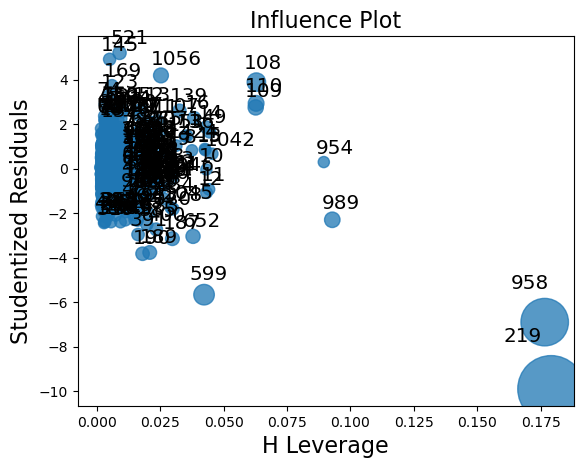

In [48]:
influence_plot(model2);

##### Note:- We Will have to remove 219) and 959)

In [49]:
df4.head(962)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
957,8895,61,50925,110,1600,5,5,85,1070
958,9390,66,50806,86,1300,3,5,19,1480
959,8750,59,50469,110,1600,5,5,85,1070
960,9750,61,50173,110,1600,5,5,85,1075


In [50]:
df4.head(222)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
217,12950,38,74319,110,1600,5,5,85,1075
218,11950,43,74285,110,1600,5,5,85,1075
219,12450,44,74172,110,1600,5,5,163,1615
220,11950,40,73042,110,1598,5,5,85,1075


In [98]:
df9= df4.copy()
df9=df9.drop(df9.index[[219,959]],axis=0).reset_index(drop=True)

In [99]:
df9.head(962)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
957,9390,66,50806,86,1300,3,5,19,1480
958,9750,61,50173,110,1600,5,5,85,1075
959,9950,62,50000,110,1600,5,5,85,1075
960,10950,65,49942,110,1600,3,6,85,1065


In [100]:
df9.head(222)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
217,12950,38,74319,110,1600,5,5,85,1075
218,11950,43,74285,110,1600,5,5,85,1075
219,11950,40,73042,110,1598,5,5,85,1075
220,14950,44,71793,110,1600,4,5,197,1067


### 12) Fitting Model3

In [101]:
model3 = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data = df9).fit()

In [102]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1266.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:35:15   Log-Likelihood:                -12261.
No. Observations:                1432   AIC:                         2.454e+04
Df Residuals:                    1423   BIC:                         2.459e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.017e+04   1397.362     -7.276      0.000   -1.29e+04   -7425.755
Age         -116.5815      2.508    -46.485      0.000    -121.501    -111.662
KM            -0.0173      0.001    -13.970      0.000      -0.020      -0.015
HP            39.2477      2.816     13.937      0.000      33.723      44.772
CC            -3.1869      0.305    -10.443      0.000      -3.786      -2.588
Doors        -62.9777     38.155     -1.651      0.099    -137.823      11.868
Gears        487.2279    186.526      2.612      0.009     121.333     853.122
QT             7.9148      1.384      5.720      0.000       5.201      10.629
Weight        24.9325      1.189     20.970      0.000      22.600      27.265
==============================================================================
Omnibus:                      195.391   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1735.652
Skew:                          -0.307   Prob(JB):                         0.00
Kurtosis:                       8.358   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 13) Predicting Price

In [105]:
df10=pd.DataFrame({"Age":32,"KM":38500, "HP":78,"CC":1500,"Doors":3,"Gears":5,"QT":200,"Weight":1200 },index=[1]) 
model3.predict(df10)

1    17467.338158
dtype: float64

In [117]:
predicted_Price = pd.DataFrame()
predicted_Price['Age'] = df9.Age
predicted_Price['KM'] = df9.KM
predicted_Price['HP'] = df9.HP
predicted_Price['CC'] = df9.CC
predicted_Price['Doors'] = df9.KM
predicted_Price['Gears'] = df9.Gears
predicted_Price['QT'] = df9.QT
predicted_Price['Weight'] = df9.Weight
predicted_Price['Predicted_Price'] = pd.DataFrame(model3.predict())

In [118]:
predicted_Price

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted_Price
0,23,46986,90,2000,46986,5,210,1165,16453.957657
1,23,72937,90,2000,72937,5,210,1165,16005.487446
2,24,41711,90,2000,41711,5,210,1165,16428.535655
3,26,48000,90,2000,48000,5,210,1165,16086.689767
4,30,38500,90,2000,38500,5,210,1170,15909.199737
...,...,...,...,...,...,...,...,...,...
1427,69,20544,86,1300,20544,5,69,1025,9015.458736
1428,72,19000,86,1300,19000,5,69,1015,8443.071751
1429,71,17016,86,1300,17016,5,69,1015,8593.939603
1430,70,16916,86,1300,16916,5,69,1015,8712.249255
